# Task 1

Create a Monte Carlo simulation to illustrate the problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
rng = np.random.default_rng()

def generate_data(num_pred, num_obs):
    X = rng.standard_normal(size=(num_obs, num_pred))
    y = np.dot(X, rng.standard_normal(size=num_pred)) + rng.normal(loc=0, scale=2, size=num_obs)
    return X, y

def calculate_R_squared(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return r2_score(y, model.predict(X))

def calculate_adjusted_R_squared(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return 1 - ((1 - r2_score(y, model.predict(X))) * (len(y) - 1)) / (len(y) - X.shape[1] - 1)

R squared =  0.0007659278471654485
R squared adjusted =  -0.00943033819521033


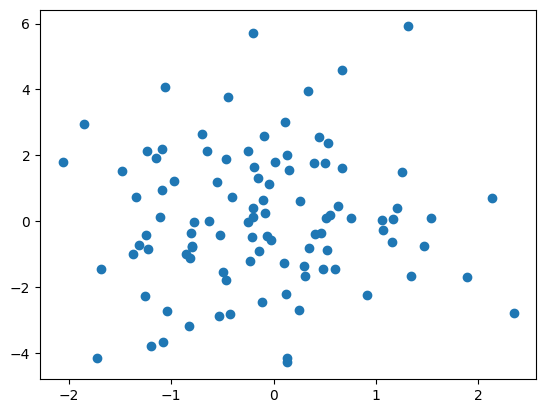

In [3]:
X, y = generate_data(1, 100)
plt.scatter(X, y)
print('R squared = ', calculate_R_squared(X, y))
print('R squared adjusted = ', calculate_adjusted_R_squared(X, y))

R squared =  0.32788546803079155
R squared adjusted =  0.32518078178544263


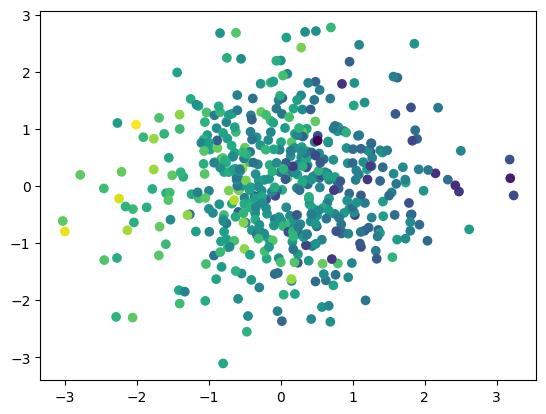

In [4]:
X, y = generate_data(2, 500)
plt.scatter(X[:,0], X[:,1], c=y)
print('R squared = ', calculate_R_squared(X, y))
print('R squared adjusted = ', calculate_adjusted_R_squared(X, y))

In [5]:
def run_simulations(num_simulations, max_num_predictors, num_observations):
    results = []
    for num_predictors in range(1, max_num_predictors, 2):
        print(num_predictors,'/',max_num_predictors)
        R_squared = []
        for _ in range(num_simulations):
            X, y = generate_data(num_predictors, num_observations)
            R_squared.append(calculate_R_squared(X, y))
        results.append((num_predictors, num_observations, np.mean(R_squared)))

    return results

1 / 75
3 / 75
5 / 75
7 / 75
9 / 75
11 / 75
13 / 75
15 / 75
17 / 75
19 / 75
21 / 75
23 / 75
25 / 75
27 / 75
29 / 75
31 / 75
33 / 75
35 / 75
37 / 75
39 / 75
41 / 75
43 / 75
45 / 75
47 / 75
49 / 75
51 / 75
53 / 75
55 / 75
57 / 75
59 / 75
61 / 75
63 / 75
65 / 75
67 / 75
69 / 75
71 / 75
73 / 75


Text(0, 0.5, '$R^2$')

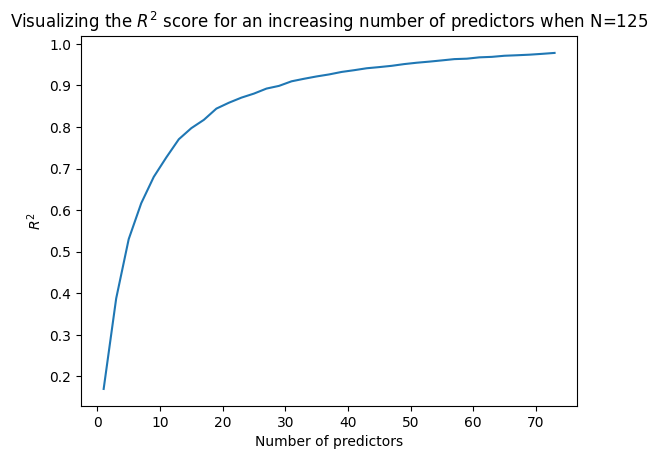

In [6]:
results = run_simulations(num_simulations=400, max_num_predictors=75, num_observations=125)

num_predictors = [res[0] for res in results]
num_observations = [res[1] for res in results]
R_squared = [res[2] for res in results]

plt.plot(num_predictors, R_squared)
plt.title('Visualizing the $R^2$ score for an increasing number of predictors when N=125')
plt.xlabel('Number of predictors')
plt.ylabel('$R^2$')

1 / 75
3 / 75
5 / 75
7 / 75
9 / 75
11 / 75
13 / 75
15 / 75
17 / 75
19 / 75
21 / 75
23 / 75
25 / 75
27 / 75
29 / 75
31 / 75
33 / 75
35 / 75
37 / 75
39 / 75
41 / 75
43 / 75
45 / 75
47 / 75
49 / 75
51 / 75
53 / 75
55 / 75
57 / 75
59 / 75
61 / 75
63 / 75
65 / 75
67 / 75
69 / 75
71 / 75
73 / 75


Text(0, 0.5, '$R^2$')

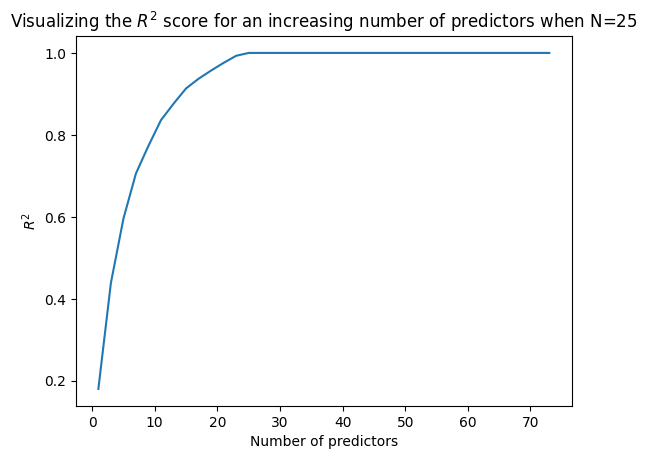

In [7]:
results = run_simulations(num_simulations=400, max_num_predictors=75, num_observations=25)

num_predictors = [res[0] for res in results]
num_observations = [res[1] for res in results]
R_squared = [res[2] for res in results]

plt.plot(num_predictors, R_squared)
plt.title('Visualizing the $R^2$ score for an increasing number of predictors when N=25')
plt.xlabel('Number of predictors')
plt.ylabel('$R^2$')

In [8]:
num_simulations = 400
max_num_predictors = 50
max_num_observations = 50

results = []
for num_predictors in range(1, max_num_predictors, 2):
    print(num_predictors,'/',max_num_predictors)
    for num_observations in range(2, max_num_observations, 2):
        R_squared = []
        for _ in range(num_simulations):
            X, y = generate_data(num_predictors, num_observations)
            R_squared.append(calculate_R_squared(X, y))
        results.append((num_predictors, num_observations, np.mean(R_squared)))

1 / 50
3 / 50
5 / 50
7 / 50
9 / 50
11 / 50
13 / 50
15 / 50
17 / 50
19 / 50
21 / 50
23 / 50
25 / 50
27 / 50
29 / 50
31 / 50
33 / 50
35 / 50
37 / 50
39 / 50
41 / 50
43 / 50
45 / 50
47 / 50
49 / 50


Text(0, 0.5, 'Number of observations')

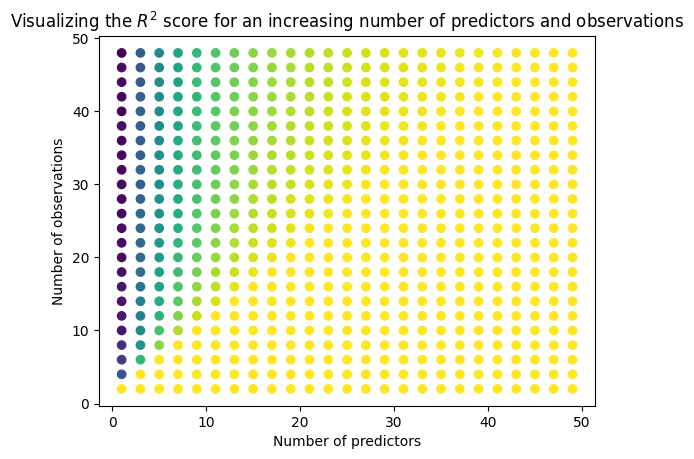

In [9]:
num_predictors = [res[0] for res in results]
num_observations = [res[1] for res in results]
R_squared = [res[2] for res in results]

plt.scatter(num_predictors, num_observations, c=R_squared)
plt.title('Visualizing the $R^2$ score for an increasing number of predictors and observations')
plt.xlabel('Number of predictors')
plt.ylabel('Number of observations')

In [10]:
unique_x, indices_x = np.unique(num_predictors, return_inverse=True)
unique_y, indices_y = np.unique(num_observations, return_inverse=True)

# Create a 2D grid for Z values using unique X and Y indices
Z_grid = np.empty((len(unique_y), len(unique_x)))
Z_grid.fill(np.nan)  # Fill the grid with NaNs initially

# Fill the Z values at corresponding indices
Z_grid[indices_y, indices_x] = R_squared

In [11]:
Z_grid

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.38413785, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.30243604, 0.71171216, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.

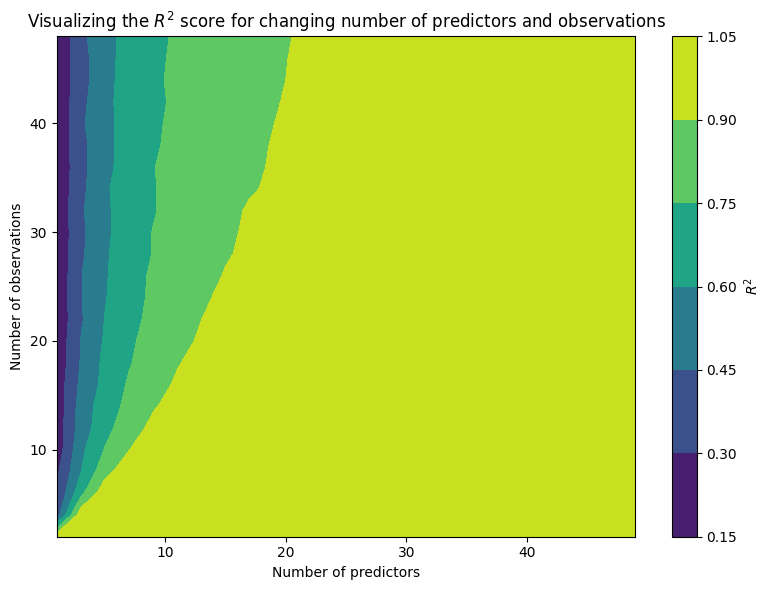

In [12]:
plt.figure(figsize=(8, 6))
contour_plot = plt.contourf(unique_x, unique_y, Z_grid, cmap='viridis')  # Use contourf for filled contours
colorbar = plt.colorbar(contour_plot, label='$R^2$')  # Add colorbar

plt.xlabel('Number of predictors')
plt.ylabel('Number of observations')
plt.title('Visualizing the $R^2$ score for changing number of predictors and observations')
plt.tight_layout()
plt.show()

# Task 2

Provide a mathematical proof showing that the problem really exists.

See Report (in PDF format)

# Task 3

Propose a solution to address the problem.

See Report (in PDF format)

# Task 4

Find a real dataset to illustrate the problem and your fix.

## General problem
In this section, we illustrate the general problem applied to the dataset with our fix.

There is another section, but that goes about a small 'case study' where we can very clearly see the problem.

### Setup

In [13]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

### Loading data

Kaggle link: https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset

Website: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [14]:
#df = pd.read_csv('/kaggle/input/boston-housing-dataset/BostonHousing.csv')
df = pd.read_csv('BostonHousing.csv')

In [15]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Notice multiple null values in RM column. RM: "average number of rooms per dwelling"

In [17]:
df.isnull().sum().sort_values(ascending=False)

rm         5
crim       0
zn         0
indus      0
chas       0
nox        0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [18]:
df.dropna(axis=0, inplace=True)

In [19]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,3.647414,11.402196,11.160619,0.069860,0.555151,6.284341,68.513373,3.786423,9.596806,409.143713,18.453493,356.298523,12.643752,22.561277
std,8.637688,23.414214,6.857123,0.255166,0.116186,0.705587,28.212221,2.103327,8.735509,169.021216,2.166327,91.672055,7.162746,9.232435
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.884000,45.000000,2.088200,4.000000,279.000000,17.400000,375.210000,6.920000,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.182700,5.000000,330.000000,19.000000,391.340000,11.380000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.625000,94.000000,5.118000,24.000000,666.000000,20.200000,396.230000,16.940000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

### Split data

In [21]:
X = df.drop('medv', axis=1)
y = df['medv']

In [22]:
from random import sample

rng = np.random.default_rng()
def generate_data_dataset(X, y, num_pred, num_obs):
    y_sampled = sample(range(1, len(y)), num_obs)
    X_sampled = X.iloc[y_sampled, sample(range(1, X.shape[1]), num_pred)]
    return X_sampled, y_sampled

#### Normal $R^2$

In [23]:
num_simulations = 400
max_num_predictors = X.shape[1]
max_num_observations = len(y)

results = []
for num_predictors in range(1, max_num_predictors, 1):
    print(num_predictors,'/',max_num_predictors)
    for num_observations in range(2, max_num_observations, 10):
        R_squared = []
        for _ in range(num_simulations):
            X_sampled, y_sampled = generate_data_dataset(X, y, num_predictors, num_observations)
            R_squared.append(calculate_R_squared(X_sampled, y_sampled))
        results.append((num_predictors, num_observations, np.mean(R_squared)))

1 / 13
2 / 13
3 / 13


KeyboardInterrupt: 

In [ ]:
results

In [ ]:
num_predictors = [res[0] for res in results]
num_observations = [res[1] for res in results]
R_squared = [res[2] for res in results]

unique_x_1, indices_x = np.unique(num_predictors, return_inverse=True)
unique_y_1, indices_y = np.unique(num_observations, return_inverse=True)

# Create a 2D grid for Z values using unique X and Y indices
Z_grid_1 = np.empty((len(unique_y_1), len(unique_x_1)))
Z_grid_1.fill(np.nan)  # Fill the grid with NaNs initially

# Fill the Z values at corresponding indices
Z_grid_1[indices_y, indices_x] = R_squared

#### Adjusted $R^2$

In [ ]:
num_simulations = 400
max_num_predictors = X.shape[1]
max_num_observations = len(y)

results = []
for num_predictors in range(1, max_num_predictors, 1):
    print(num_predictors, '/', max_num_predictors)
    for num_observations in range(max_num_predictors+2, max_num_observations, 10):
        R_squared = []
        for _ in range(num_simulations):
            X_sampled, y_sampled = generate_data_dataset(X, y, num_predictors, num_observations)
            R_squared.append(calculate_adjusted_R_squared(X_sampled, y_sampled))
        results.append((num_predictors, num_observations, np.mean(R_squared)))

In [ ]:
num_predictors = [res[0] for res in results]
num_observations = [res[1] for res in results]
R_squared = [res[2] for res in results]

unique_x_2, indices_x = np.unique(num_predictors, return_inverse=True)
unique_y_2, indices_y = np.unique(num_observations, return_inverse=True)

# Create a 2D grid for Z values using unique X and Y indices
Z_grid_2 = np.empty((len(unique_y_2), len(unique_x_2)))
Z_grid_2.fill(np.nan)  # Fill the grid with NaNs initially

# Fill the Z values at corresponding indices
Z_grid_2[indices_y, indices_x] = R_squared

### Combined plot

In [ ]:
z_min = min(np.min(Z_grid_1), np.min(Z_grid_2))
z_max = max(np.max(Z_grid_1), np.max(Z_grid_2))

In [ ]:
fig = plt.figure(figsize=(8,14))
gs = fig.add_gridspec(2, 1, height_ratios=[1, 1.225])

ax1 = fig.add_subplot(gs[0])
contour_plot_1 = ax1.contourf(unique_x_1, unique_y_1, Z_grid_1, cmap='viridis', vmin=z_min, vmax=z_max)  # Use contourf for filled contours
#colorbar_1 = plt.colorbar(contour_plot_1, label='$R^2$', ax=axes[0])  # Add colorbar

ax1.set_xlabel('Number of predictors')
ax1.set_ylabel('Number of observations')
ax1.set_title('Visualizing the $R^2$ score for changing number of predictors and observations')

ax2 = fig.add_subplot(gs[1])
contour_plot_2 = ax2.contourf(unique_x_2, unique_y_2, Z_grid_2, cmap='viridis', vmin=z_min, vmax=z_max, levels=contour_plot_1.levels)  # Use contourf for filled contours
colorbar_2 = plt.colorbar(contour_plot_2, label='$R^2$', ax=ax2, location='top')  # Add colorbar

ax2.set_xlabel('Number of predictors')
ax2.set_ylabel('Number of observations')
ax2.set_title('Visualizing the adj $R^2$ score for changing number of predictors and observations')

plt.tight_layout()
plt.show()

## Small case study

This section is about a small 'case study' where we can very clearly see the problem.

In [ ]:
#Train:
df = df.sample(n=50, random_state=69) #[2,4], [7,9]
#df = df.sample(n=50, random_state=34) #[3,4], [6,7], [8,10], [11,13]
#df = df.sample(n=50, random_state=1) #[5,7], [7,9]

#Test:
#df = df.sample(n=50, random_state=13) #[3,4] and [4,5]
#df = df.sample(n=50, random_state=9000) #overall

### Feature importance based on public Kaggle notebook (adapted)

Notebook from "PREETISHA SRIVASTAVA" on https://www.kaggle.com/code/preetishasrivastava/boston-house-price-eda-and-prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def rfc_feature_selection(X, y):
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.3, random_state=42)
    
    rfc = RandomForestRegressor(random_state=42)
    rfc.fit(X_train, y_train)
    rfc_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)
    
    return rfc_importances

rfc_importances = rfc_feature_selection(X, y)
rfc_importances.plot(kind='bar')
plt.show()

In [ ]:
feature_importances = list(rfc_importances.index) #list of feature names sorted on importance

In [ ]:
feature_importances

### Machine Learning model

In [ ]:
maes = []
r_squared_scores = []
adjusted_r_squared_scores = []

for i in range(len(feature_importances)):
    selected_features = feature_importances[:i+1]
    X_subset = X[selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.33, random_state=21)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    #y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    #mae = mean_absolute_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_train, y_pred_train)
    maes.append(mae)
    
    #r_squared_score = r2_score(y_test, y_pred_test)
    r_squared_score = r2_score(y_train, y_pred_train)
    r_squared_scores.append(r_squared_score)
    
    adjusted_r_squared_score = 1 - ((1 - r_squared_score) * (len(y) - 1)) / (len(y) - len(selected_features) - 1)
    adjusted_r_squared_scores.append(adjusted_r_squared_score)

### Plots clearly indicating the problem

In [ ]:
plt.plot(range(1, len(feature_importances)+1), maes)
plt.xlabel('Top x most important features')
plt.ylabel('Mean Absolute Error')
plt.title('Adding features influence on MAE')
plt.show()

In [ ]:
plt.plot(range(1, len(feature_importances)+1), r_squared_scores, label = "Normal $R^2$")
plt.plot(range(1, len(feature_importances)+1), adjusted_r_squared_scores, label = "Adjusted $R^2$")
plt.xlabel('Top x most important features')
plt.ylabel('(Adjusted) $R^2$ score')
plt.title('Adding features influence on (adj) $R^2$ score')
plt.legend()
plt.show()

In [ ]:
import numpy as np
difference = np.array(r_squared_scores)-np.array(adjusted_r_squared_scores)

plt.plot(range(1, len(feature_importances)+1), difference, label = "Difference")
plt.xlabel('Top x most important features')
plt.ylabel('Difference in R^2 scores')
plt.title('Adding features influence on difference in R^2 scores')
plt.legend()
plt.show()